# Pokemon Data Analysis

This package provides an implementation of Pokemon data analysis, which is orginated from [Michael Metter's kernel](https://www.kaggle.com/mmetter/pokemon-data-analysis-tutorial/notebook). 
The motivation of this project is to understand the basic concept of data analysis including analyze the characteristics of the data set, search for the incomplete part of the data, compensate the dataset with some calculations, and simply visualize our analysis for better understanding. The pokemon dataset could drive an interest to students about the dynamics of the pokemon universe through data and become a great tool to help understanding data analysis. Plus, it might be helpful to practice for python programming skills. 
I tried to follow the process of the notebook of Micheal Metter's kernel, which includes a great job of data analysis with python. I added some additional comments to each cells for detailed explanations of the code.  

In [7]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns #data visualization

### Data description
This dataset is from [Pokemon- Weedle's Cave](https://www.kaggle.com/terminus7/pokemon-challenge) of Kaggle. Call the csv files by using Pandas. 

- `combats.csv` : the dataset of pokedex.
- `pokemon.csv` : the dataset including battle records of the pokemons.
- `tests.csv` : not used for our analysis.

In [8]:
# Import the dataset
dirPath = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
pokemon = pd.read_csv(dirPath + "/data/pokemon.csv")

In [9]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [10]:
# rename the column with a pound sign/hashtag as "number" its name
# The reason for this is when  we try and access this column later it will comment out the code
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [11]:
pokemon.head(n = 10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [12]:
combat = pd.read_csv(dirPath + "/data/combats.csv")

In [13]:
combat

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [14]:
combat.tail(n = 8)

,First_pokemon,Second_pokemon,Winner
49992,592,703,703
49993,728,762,728
49994,657,681,681
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109
49999,9,73,9


In [15]:
print("Dimensions of Pokemon: " + str(pokemon.shape))
print("Dimensions of Combat: " + str(combat.shape))

Dimensions of Pokemon: (800, 12)
Dimensions of Combat: (50000, 3)


# Missing values

In [16]:
# isna() = isnull() : Whether the data values are null.
pokemon.isna() 

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,False,False,False,False,False,False,False,False,False,False,False,False
796,False,False,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
pokemon.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [18]:
pokemon['Name'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Name, Length: 800, dtype: bool

In [19]:
# Find the missing pokemon.
pokemon[pokemon['Name'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [20]:
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

This pokemon is before the missing Pokemon: Mankey
This pokemon is after the missing Pokemon: Growlithe


In [21]:
# Update missing pokemon
pokemon['Name'][62] = "Primeape" 

/Users/bumjoonpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
combat_winner = combat['Winner']
combat_winner # series

0        298
1        701
2        668
3        683
4        151
        ... 
49995    707
49996    589
49997    368
49998    109
49999      9
Name: Winner, Length: 50000, dtype: int64

In [23]:
#iloc : index location, select the rows with index.
combat.iloc[1] 

First_pokemon     702
Second_pokemon    701
Winner            701
Name: 1, dtype: int64

In [24]:
# Count the total number of wins of each pokemon. 
total_Wins = combat_winner.value_counts()
total_Wins

163    152
154    136
438    136
428    134
432    133
      ... 
189      5
237      4
639      4
190      3
290      3
Name: Winner, Length: 783, dtype: int64

In [25]:
# Find pokemon number 163.
pokemon.iloc[[162]]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True


In [26]:
# Find pokemon number 154
pokemon.iloc[[153]]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False


In [27]:
combat.groupby('Winner')

In [28]:
# Get the number of wins for each pokemon.
numberOfWins = combat.groupby('Winner').count()
numberOfWins

,First_pokemon,Second_pokemon
Winner,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55
...,...,...
796,39,39
797,116,116
798,60,60


In [29]:
# Count the number of battles for each pokemon as a First_pokemon.
countByFirst = combat.groupby('First_pokemon').count()
# Count the number of battles for each pokemon as a Second_pokemon.
countBySecond = combat.groupby('Second_pokemon').count()

In [30]:
countByFirst

,Second_pokemon,Winner
First_pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50
...,...,...
796,49,49
797,64,64
798,60,60


In [31]:
countByFirst.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            791, 792, 793, 794, 795, 796, 797, 798, 799, 800],
           dtype='int64', name='First_pokemon', length=784)

In [32]:
# Make the union set of countByFirst.index & countBySecond.index.
union_index = countByFirst.index.join(countBySecond.index, how = 'outer')
union_index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            791, 792, 793, 794, 795, 796, 797, 798, 799, 800],
           dtype='int64', name='First_pokemon', length=784)

In [33]:
# Find the index of always losing pokemon.
# This pokemon is not included in the pokemons which has at least one more battles.
find_losing_pokemon = np.setdiff1d(union_index, numberOfWins.index) - 1
find_losing_pokemon

array([230])

In [34]:
# Find the always losing pokemon.
# Shuckle is the only pokemon that always lose for the battle.
always_losing_pokemon = pokemon.iloc[find_losing_pokemon]
always_losing_pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False


In [35]:
# Feature engineering 
# Add the total fights and win percentage to pokemon data. 
numberOfWins['Total Fights'] = countByFirst['Winner'] + countBySecond['Winner']
numberOfWins['Win Percentage']= numberOfWins['First_pokemon']/numberOfWins['Total Fights']

In [36]:
numberOfWins

,First_pokemon,Second_pokemon,Total Fights,Win Percentage
Winner,,,,
1,37,37,133,0.278195
2,46,46,121,0.380165
3,89,89,132,0.674242
4,70,70,125,0.560000
5,55,55,112,0.491071
...,...,...,...,...
796,39,39,105,0.371429
797,116,116,131,0.885496
798,60,60,119,0.504202


In [37]:
# Check total wins, total fights, win percentage of pokemon number 154
numberOfWins.loc[[154]]

,First_pokemon,Second_pokemon,Total Fights,Win Percentage
Winner,,,,
154,136,136,141,0.964539


In [38]:
# Merge the numberOfWins with the original pokemon dataset with right index. 
results = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')
results

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,55.0,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39.0,39.0,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116.0,116.0,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60.0,60.0,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89.0,89.0,144.0,0.618056


In [39]:
# Can also merge with common part = left : 'Number' , right : 'Winner'
results2 = pd.merge(pokemon, numberOfWins, left_on='Number', right_on = 'Winner', how = 'left')
results2

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,55.0,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39.0,39.0,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116.0,116.0,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60.0,60.0,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89.0,89.0,144.0,0.618056


In [40]:
# Check final information of pokemon number 154 with total wins, total fights, win percentage.
results.iloc[[153]]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539


In [41]:
# Pokemons without battle except shuckle. 
# Shuckle had battle records, but with zero wins. 
No_win_percentage = results[results['Win Percentage'].isnull()]
No_win_percentage

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


In [42]:
# Top 10 highest winning percentage pokemons (sorted by the winning percentages in descending order)
results[np.isfinite(results['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


In [43]:
# Top 10 lowest winning percentage pokemons (sorted by the winning percentage in ascending order)
results[np.isfinite(results['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


In [44]:
# The basic statistics of each variable such as mean, min, max, std, etc.
# Describes the range and the average of these values we are working with
results.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


# Visualization of the analysis

Text(0.5, 1.0, 'Total Pokemon by Type 1')

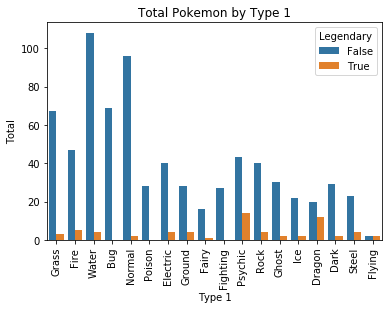

In [45]:
# Countplot : show the counts of observations for each category.
# With given hue, separate the counts of each ccategory for its hue.
# Hue : Legendary
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

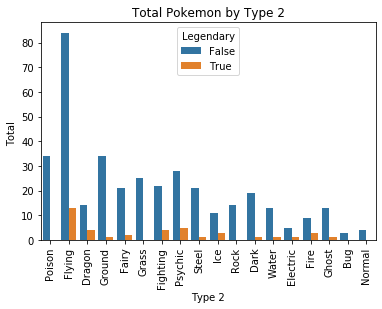

In [46]:
# Hue : whether legendary or not
ax = sns.countplot(x="Type 2", hue="Legendary", data=results)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

In [47]:
# Find the average win percentage of the pokemons for each 'type 1'.
results.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


In [48]:
# Find the average win percentage of the pokemons for each 'type 2'.
results.groupby('Type 2').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage", ascending = False)

,Win Percentage
Type 2,
Fighting,0.676791
Flying,0.663559
Normal,0.640896
Fire,0.633781
Dragon,0.605966
Dark,0.594685
Ice,0.587451
Electric,0.532644
Psychic,0.510052


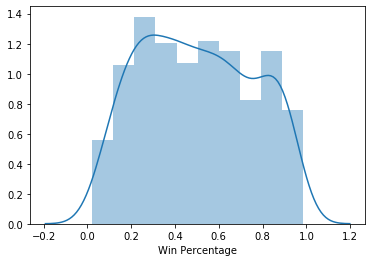

In [49]:
# Distplot : Show both histogram, rug and kernel density function
# Find the histogram and kernel density estimation of win percentage. 
sns.distplot(results["Win Percentage"].dropna(), kde = True, bins = 10)

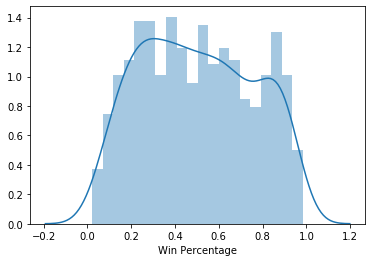

In [50]:
sns.distplot(results["Win Percentage"].dropna(), kde = True, bins = 20)

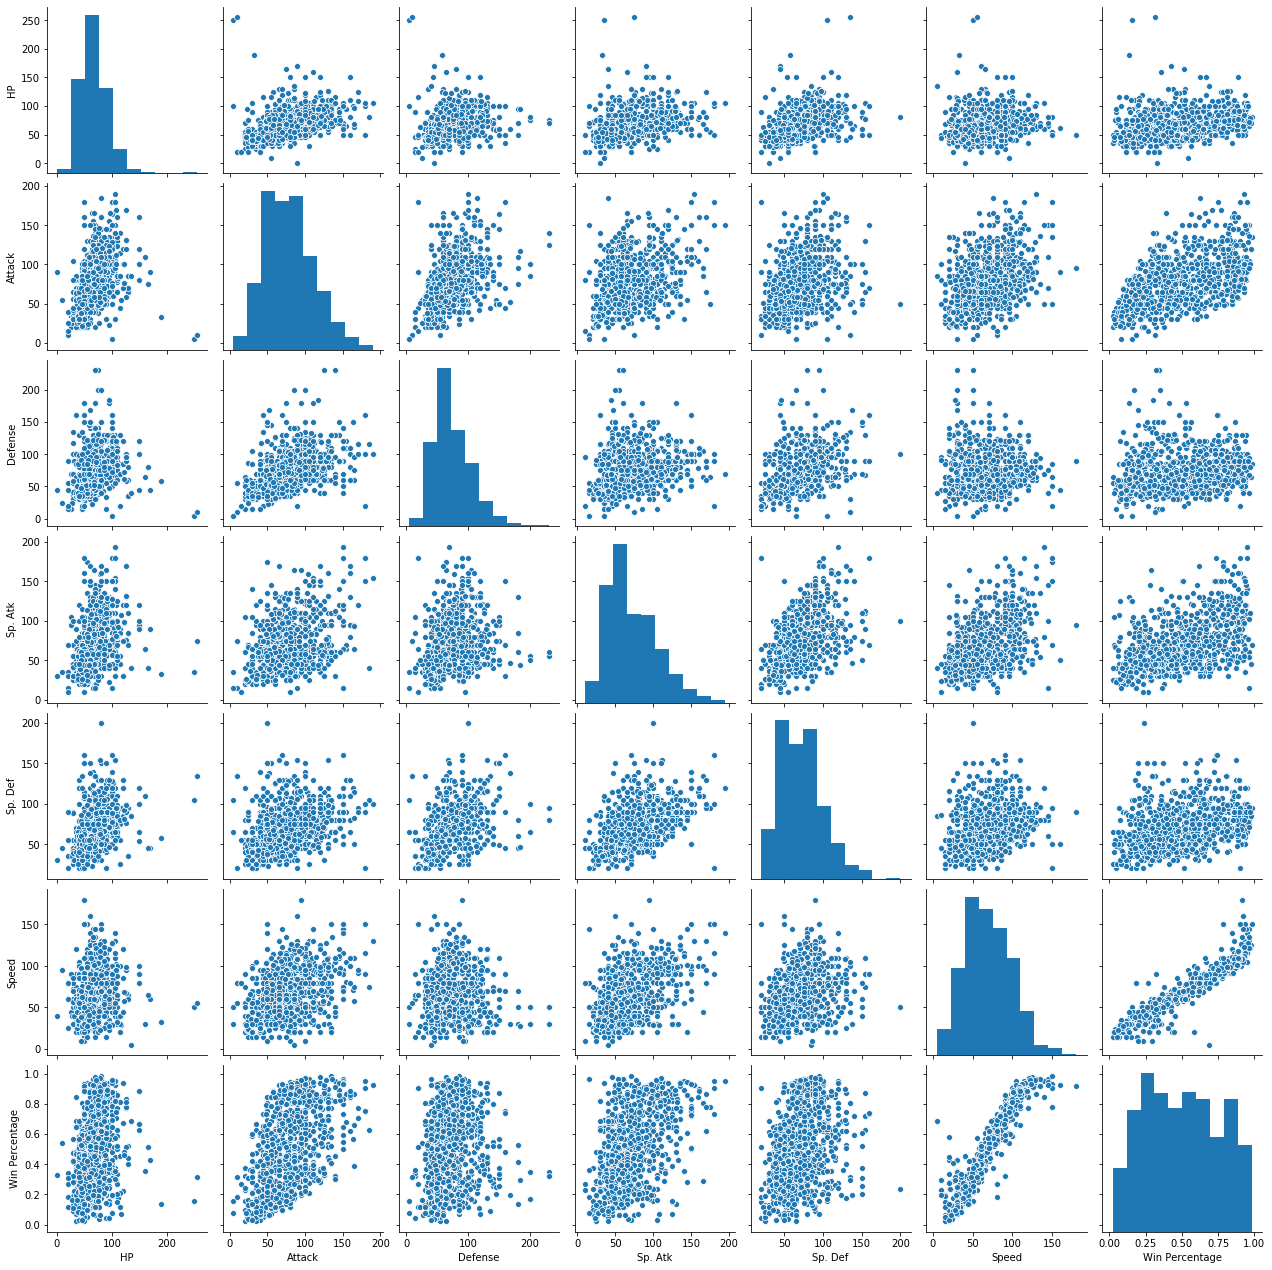

In [51]:
# pairplot : scatter plot for different variables, histogram for same variable (diagonal)
# Find the pairplot for given columns(features).
# We can figure out the correlations of each column variable.
# Python slicing [start:end:step]
# ex) a = [1, 2, 3, 4, 5]
# [2:] (index 2 to end) = [3, 4, 5]
# [:4] (index start to 4 (= before 5)) = [3, 4]
# [-4:-2] (end - 4 to end - 3 (before end - 2)) = [2, 3]
# ex) [:] (start to end) = [1, 2, 3, 4, 5]
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
sns.pairplot(results.loc[:,col].dropna())

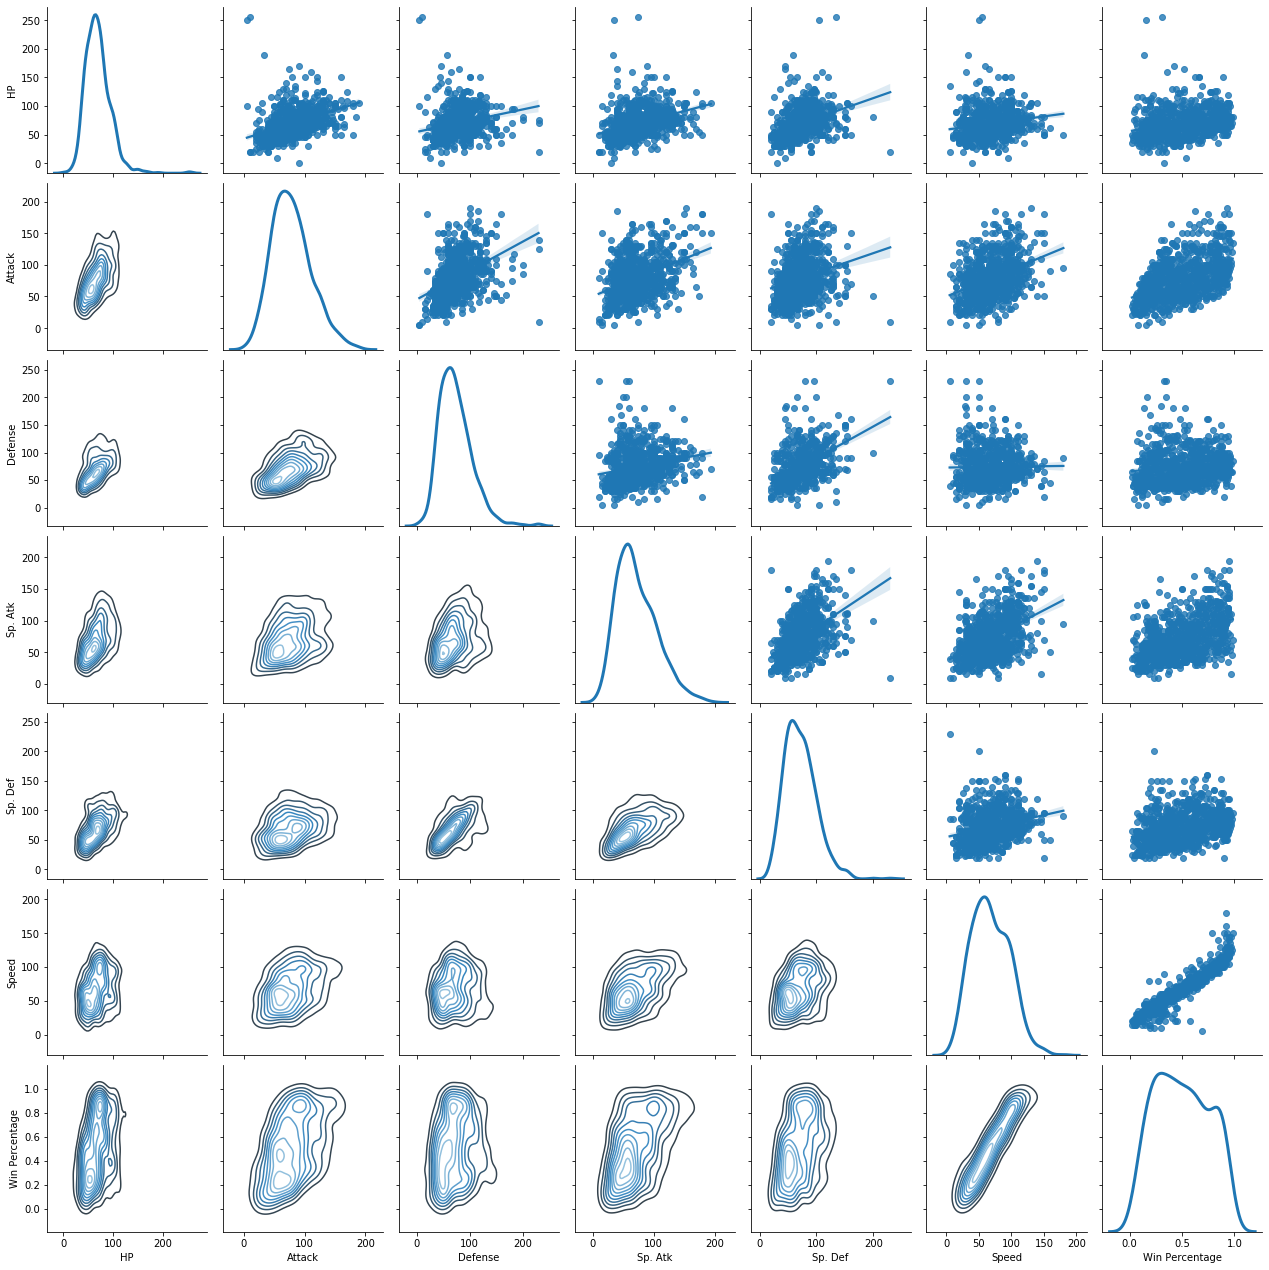

In [52]:
# Pairgrid is similar to pairplot, but can choose the graph of diagonal, lower triangle, upper triangle of the matrix.
# Find the pairgrid for given col.
g = sns.PairGrid(results.loc[:, col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw = 3)

In [53]:
# Precise correlation values for given col. 
results.loc[:,col].corr() 

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


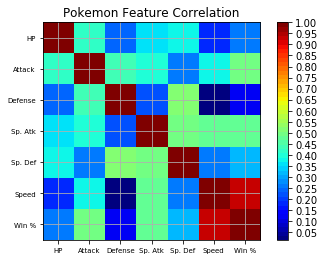

In [54]:
# Find the correlation matrix cmap.
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
# This function was taken from the link above
def correlation_matrix(df):
    import matplotlib.cm as cm
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels = ['Type1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win %']
    ax1.set_xticklabels(labels, fontsize = 7)
    ax1.set_yticklabels(labels, fontsize = 7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00, 0.05, 0.10, 0.15, .20, .25, .30, .35, .40, .45, .50, .55, .60, .65, .70, .75, .80, .85, .90, .95, 1])
    plt.show()
    
correlation_matrix(results.loc[:, col])

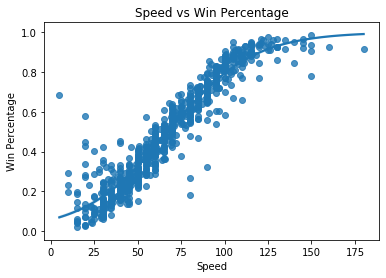

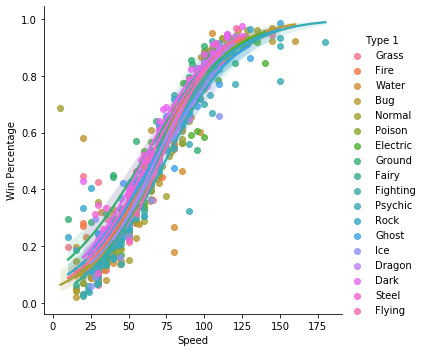

In [55]:
# Find features with the greatest correlations (Speed, Win percentage)
sns.regplot(x = 'Speed', y = 'Win Percentage', data = results, logistic = True).set_title("Speed vs Win Percentage")
# Find features with the greatest correlations (Speed, Win percentage) for each hue (type 1). 
sns.lmplot(x = 'Speed', y = 'Win Percentage', data = results, hue = 'Type 1', logistic = True)

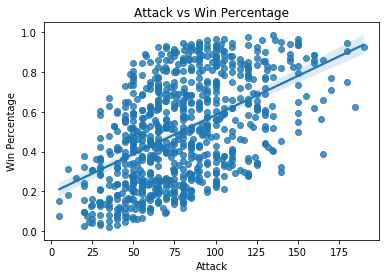

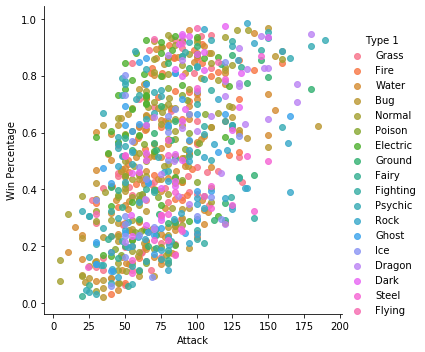

In [56]:
# Find features with the second greatest correlations (Attack, Win percentage)
sns.regplot(x = "Attack", y = "Win Percentage", data = results).set_title("Attack vs Win Percentage")
# Find features with the second greatest correlations (Attack, Win percentage) for each hue (type 1). 
sns.lmplot(x = 'Attack', y = 'Win Percentage', data = results, hue = 'Type 1', fit_reg = False)

In [57]:
dataset = results2

In [58]:
#remove rows with NA values because it will cause errors when fitting to the model
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

# Encoding categorical data (if there is some)
# In this case it could be pokemon type
#'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 3] = labelencoder.fit_transform(X[:, 3])
#onehotencoder = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()'''

# Avoiding the Dummy Variable Trap
#X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [60]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    # Fitting Multiple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Validating the results
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_linearreg(X_train, X_test, y_train, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
def ml_svm(X_train, X_test, y_train, y_test):
    # Fitting SVR to the dataset
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    #Predict Output
    y_pred= regressor.predict(X_test)
    #y_pred = sc_y.inverse_transform(y_pred)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_svm(X_train, X_test, y_train, y_test)

In [ ]:
def ml_decisiontree(X_train, X_test, y_train, y_test):
    # Fitting Decision Tree Regression to the dataset
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_decisiontree(X_train, X_test, y_train, y_test)

In [ ]:
# no feature scaling needed
def ml_randomforest(X_train, X_test, y_train, y_test):
    # Fitting Random Forest Regression to the dataset
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_randomforest(X_train, X_test, y_train, y_test)
    
# Visualising the Random Forest Regression results (higher resolution)
#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'red')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
#plt.title('Truth or Bluff (Random Forest Regression)')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()

In [ ]:
def ml_xgboost(X_train, X_test, y_train, y_test):
    import xgboost
    # fitting XGBoost to training set
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    xgb.fit(X_train,y_train)
    print(xgb.score(X_train, y_train))
    # Prediction
    y_pred = xgb.predict(X_test)
    #print(explained_variance_score(y_pred ,y_test))
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_xgboost(X_train, X_test, y_train, y_test)

In [ ]:
#store all the ML results in an array
all_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#all_stats

In [ ]:
#PCA

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components = None)
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Provides a vector of the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)

#loadings vectors
#print(pca.components_.T * np.sqrt(pca.explained_variance_))

In [ ]:
# run PCA transformed data on ML algos
PCA = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#PCA
#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

In [ ]:
dataset = results2
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.loc[:, ['Attack','Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

reduced_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]

In [ ]:
#compare results from the 3 trials 
ml_results = pd.DataFrame({'All Factors': all_stats, 'Reduced Factors': reduced_stats, 'PCA': PCA})
ml_results.rename(index = {0:'Linear',1:'SVM', 2:'Decision Tree', 3:'Random Forest', 4:'XGBoost'})